<a href="https://colab.research.google.com/github/ML-HW-SYS/a4-WDaugherty/blob/main/1_numerical_precision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numerical Precision

In this section, you will investigate how different convolution
and matrix-matrix multiplication kernel performs when changing the
numerical precision.

## 1. Set-up

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Make sure your token is stored in a txt file at the location below.
# This way there is no risk that you will push it to your repo
# Never share your token with anyone, it is basically your github password!
with open('/content/gdrive/MyDrive/ece5545/token.txt') as f:
    token = f.readline().strip()
# Use another file to store your github username
# with open('/content/gdrive/MyDrive/ece5545/git_username.txt') as f:
#     handle = f.readline().strip()

In [ ]:
# Clone your github repo
YOUR_TOKEN = token
YOUR_HANDLE = 'WDaugherty'
BRANCH = "main"

%mkdir /content/gdrive/MyDrive/ece5545
%cd /content/gdrive/MyDrive/ece5545
!git clone https://{YOUR_TOKEN}@github.com/ML-HW-SYS/a4-{YOUR_HANDLE}.git
%cd /content/gdrive/MyDrive/ece5545/a4-{YOUR_HANDLE}
!git checkout {BRANCH}
!git pull
%cd /content/gdrive/MyDrive/ece5545

PROJECT_ROOT = f"/content/gdrive/MyDrive/ece5545/a4-{YOUR_HANDLE}"

mkdir: cannot create directory ‘/content/gdrive/MyDrive/ece5545’: File exists
/content/gdrive/MyDrive/ece5545
fatal: destination path 'a4-WDaugherty' already exists and is not an empty directory.
/content/gdrive/MyDrive/ece5545/a4-WDaugherty
Already on 'main'
Your branch is up to date with 'origin/main'.
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 7 (delta 4), reused 7 (delta 4), pack-reused 0
Unpacking objects: 100% (7/7), 671 bytes | 1024 bytes/s, done.
From https://github.com/ML-HW-SYS/a4-WDaugherty
   98c9c15..79a4e19  main       -> origin/main
Updating 98c9c15..79a4e19
Fast-forward
 mnist.py      |  4 ++--
 src/matmul.py | 10 +++++-----
 2 files changed, 7 insertions(+), 7 deletions(-)
/content/gdrive/MyDrive/ece5545


In [ ]:
# This extension reloads all imports before running each cell
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Verify the following cell prints your github repository.

In [ ]:
!ls {PROJECT_ROOT}

1-numerical_precision.ipynb  arr.npz  mnist.py	   README.md	src
2-svd_rank.ipynb	     data     __pycache__  results.txt	tests


In [ ]:
!pip install torch numpy matplotlib

# 2. Convolution

In the following cell(s), please plot the reconstruction error of an
approximated tensor (in the y-axis) with the numerical precision
(in the x-axis). Please show one plot for `winograd` and one plot for `fft`.

## Definition of Error and Precision 

In [ ]:
%cd a4-WDaugherty/
from src.conv2d import conv2d
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

precisions = [torch.float64, torch.float32, torch.int64, torch.int32, torch.int16, torch.int8]
strings = ['float64', 'float32', 'int64', 'int32', 'int16', 'int8']
def get_error_l1(method, precision, input_size, int_type):
    if int_type:
        x = torch.randint(-3,3, size=(input_size, input_size), dtype=precision)
        k = torch.randint(-3,3, size=(3, 3), dtype=precision)
        b = torch.randint(-3,3, size=(1,), dtype=precision)
    else:
        x = torch.rand((input_size, input_size), dtype=precision) * 3
        k = torch.rand(3, 3, dtype=precision) * 3
        b = torch.rand(size=(1,), dtype=precision) * 3


    ans = conv2d(x, k, b, method='torch').float()
    out = conv2d(x, k, b, method=method).float()
    return F.l1_loss(ans, out).item()


from torch.nn import functional as F

precisions = [torch.float64, torch.float32, torch.int64, torch.int32, torch.int16, torch.int8]
strings = ['float64', 'float32', 'int64', 'int32', 'int16', 'int8']

def get_error_l2(method, precision, input_size, int_type):
    if int_type:
        x = torch.randint(-3,3, size=(input_size, input_size), dtype=precision)
        k = torch.randint(-3,3, size=(3, 3), dtype=precision)
        b = torch.randint(-3,3, size=(1,), dtype=precision)
    else:
        x = torch.rand((input_size, input_size), dtype=precision) * 3
        k = torch.rand(3, 3, dtype=precision) * 3
        b = torch.rand(size=(1,), dtype=precision) * 3

    ans = conv2d(x, k, b, method='torch').float()
    out = conv2d(x, k, b, method=method).float()
    
    # Use F.mse_loss instead of F.l1_loss to compute L2 error
    return F.mse_loss(ans, out).item()

def calculate_reconstruction_errors(function_name, precisions):
    errors = []
    strings = [str(p).replace('torch.', '') for p in precisions]
    
    for i, p in enumerate(precisions):
        errors.append(get_error_l1(function_name, p, 15, i > 1))

    plt.plot(strings, errors)
    plt.title(f"Reconstruction Error based on precision for {function_name}")
    plt.xlabel("Precision")
    plt.ylabel("Reconstruction Error")
    plt.show()

    return errors

[Errno 2] No such file or directory: 'a4-WDaugherty/'
/content/gdrive/MyDrive/ece5545/a4-WDaugherty


## Winograd Function 

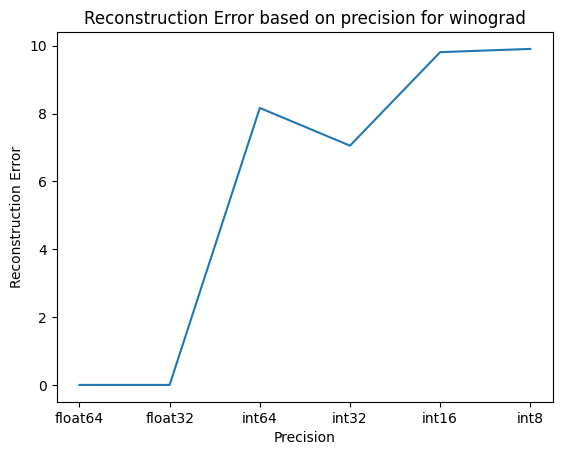

[6.940942967048613e-07, 1.2809708778149798e-06, 8.165680885314941, 7.0532546043396, 9.810650825500488, 9.905325889587402]


In [ ]:
import sys
sys.path.insert(0, PROJECT_ROOT)
from src.conv2d import winograd
# TODO: plot the error v.s. precision curve


error_list = calculate_reconstruction_errors("winograd", precisions)
print(error_list)

## FFT Function

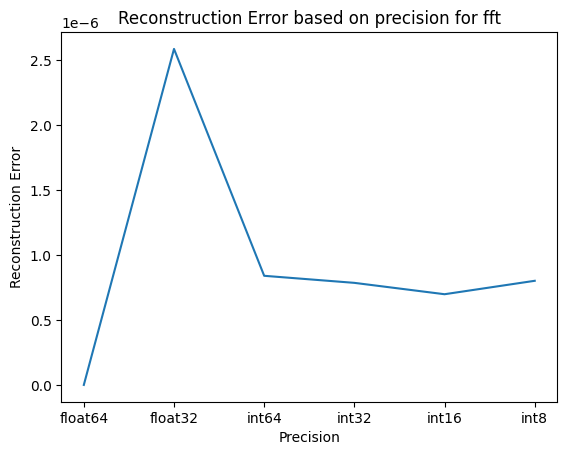

[0.0, 2.5845138225122355e-06, 8.39402673591394e-07, 7.850883889659599e-07, 6.97621203471499e-07, 8.009594694158295e-07]


In [ ]:
import sys
sys.path.insert(0, PROJECT_ROOT)
from src.conv2d import fft
# TODO: plot the error v.s. precision curve

error_list = calculate_reconstruction_errors("fft", precisions)
print(error_list)



## Im2col Function 

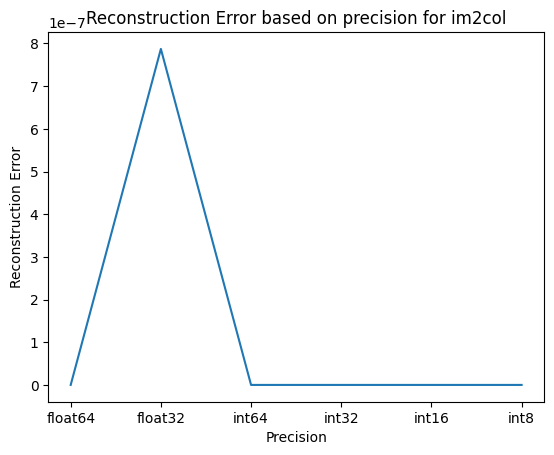

[0.0, 7.872045557633101e-07, 0.0, 0.0, 0.0, 0.0]


In [ ]:
import sys
sys.path.insert(0, PROJECT_ROOT)
from src.conv2d import im2col
# TODO: plot the error v.s. precision curve


error_list = calculate_reconstruction_errors("im2col", precisions)
print(error_list)

# 3. Matrix-matrix Multiply

In the following cell(s), please plot the reconstruction error (in the y-axis)
with the different numerical precisions (in the x-axis) for `log` (i.e.
logorithmic matrix-matrix multiplication).

Precision: float64, Error: 0.0
Precision: float32, Error: 9.112887710216455e-06
Precision: int64, Error: 9.006923846754944e-07
Precision: int32, Error: 2.9140048809495056e-06
Precision: int16, Error: 1.430511474609375e-06
Precision: int8, Error: 5.298190899338806e-07
[0.0, 9.112887710216455e-06, 9.006923846754944e-07, 2.9140048809495056e-06, 1.430511474609375e-06, 5.298190899338806e-07]


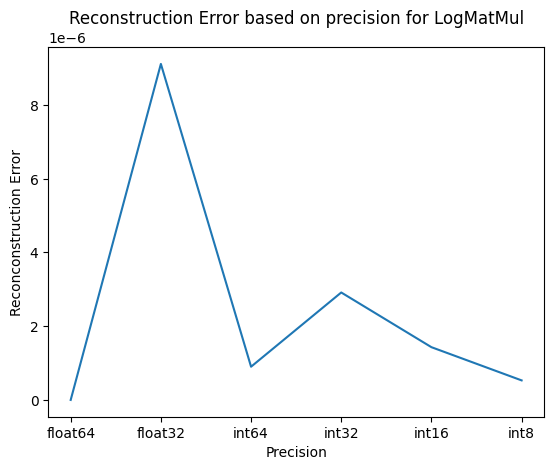

In [ ]:
import sys
sys.path.insert(0, PROJECT_ROOT)

from src.matmul import logmatmul

# TODO: plot the error v.s. precision curve


precisions = [torch.float64, torch.float32, torch.int64, torch.int32, torch.int16, torch.int8]
strings = ['float64', 'float32', 'int64', 'int32', 'int16', 'int8']

def get_matmul_error(M, N, K, precision, int_type, method='log'):
    if int_type:
        A = torch.randint(-5, 5, size=(M, N), dtype=precision)
        B = torch.randint(-5, 5, size=(N, K), dtype=precision)
    else:
        A = torch.randn(M, N, dtype=precision) * 5
        B = torch.randn(N, K, dtype=precision) * 5

    if method == 'log':
        out = logmatmul(A, B)
    elif method == 'torch':
        out = torch.matmul(A, B)
    else:
        raise ValueError("Invalid method specified.")

    ans = torch.matmul(A, B)
    return F.l1_loss(ans.float(), out.float()).item()


errors = []
for i, p in enumerate(precisions):
    torch_error = get_matmul_error(3, 10, 3, p, i > 1, method='torch')
    log_error = get_matmul_error(3, 10, 3, p, i > 1, method='log')
    error = abs(torch_error - log_error)
    errors.append(error)
    print(f"Precision: {strings[i]}, Error: {error}")

print(errors)
plt.plot(strings, errors)
plt.title("Reconstruction Error based on precision for LogMatMul")
plt.xlabel("Precision")
plt.ylabel("Reconconstruction Error")
plt.show()


# Comparisons

In [ ]:
def compare_plot_errors(precisions):
    methods = ['winograd', 'fft', 'im2col', 'matmul']
    errors_dict = {method: [] for method in methods}
    strings = [str(p) for p in precisions]

    for i, p in enumerate(precisions):
        errors_dict['winograd'].append(get_error_l1("winograd", p, 15, i > 1))
        errors_dict['fft'].append(get_error_l1("fft", p, 15, i > 1))
        errors_dict['im2col'].append(get_error_l1("im2col", p, 15, i > 1))

        torch_error = get_matmul_error(3, 10, 3, p, i > 1, method='torch')
        log_error = get_matmul_error(3, 10, 3, p, i > 1, method='log')
        error = abs(torch_error - log_error)
        errors_dict['matmul'].append(error)

    for method, errors in errors_dict.items():
        plt.plot(strings, errors, marker='o', linestyle='-', label=method)

    plt.title("Reconstruction Error based on precision for different methods")
    plt.xlabel("Precision")
    plt.ylabel("log scale Reconstruction Error")
    plt.legend()
    plt.show()

precisions = [1, 2, 4, 8, 16, 32]
compare_plot_errors(precisions)

AttributeError: ignored

# 5. MNIST

In [ ]:
from mnist import *

ModuleNotFoundError: ignored

In [ ]:
%cd a4-WDaugherty
!python mnist.py

/content/gdrive/MyDrive/ece5545/a4-WDaugherty
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.324591
Train Epoch: 1 [640/60000 (1%)]	Loss: 0.946798
Train Epoch: 1 [1280/60000 (2%)]	Loss: 0.924738
Train Epoch: 1 [1920/60000 (3%)]	Loss: 0.479755
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.545340
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.344036
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.194653
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.343248
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.533786
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.228848
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.203924
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.316749
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.390759
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.162607
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.225830
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.081305
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.212428
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.162631
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.472853
Train Epoch: 1 [12160/60000 (20%)

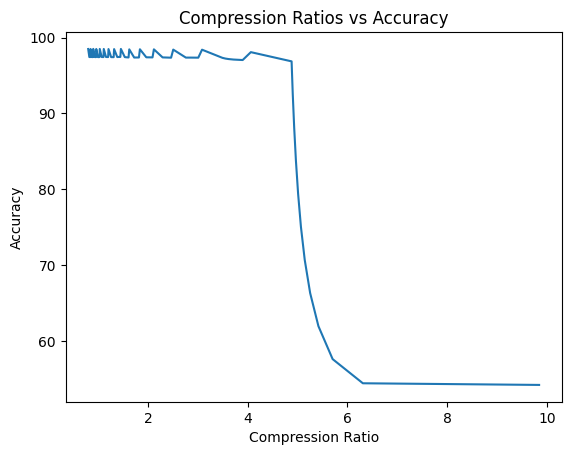

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



data = np.load("arr.npz")
compression_ratios = data["compression_ratios"]
accuracies = data["accuracies"]
runtimes = data["runtimes"]

def smoothing_plot(data1, data2, window_size, x_label, y_label, title):
    def smooht_data(data, window_size):
        df = pd.Series(data)
        smoothed_data = df.rolling(window_size).mean().dropna().tolist()
        return smoothed_data
    
    smoothed_data1 = smooht_data(data1, window_size)
    smoothed_data2 = smooht_data(data2, window_size)

    plt.plot(smoothed_data1, smoothed_data2)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()



window_size = 10
x_label = "Compression Ratio"
y_label = "Accuracy"
title = "Compression Ratios vs Accuracy"

smoothing_plot(compression_ratios, accuracies, window_size, x_label, y_label, title)



In [ ]:
print(smoothed_compression_ratios)
print(smoothed_accuracies )
print(smoothed_runtimes )

[9.842971775844218, 6.309067840053161, 5.70272714313108, 5.417631097054581, 5.251918221910493, 5.143576688787399, 5.067206994272304, 5.0104755863557, 4.966670181603811, 4.931824716099256, 4.903445162644608, 4.879884554378661, 4.062754937193135, 3.898988950169329, 3.791675833327696, 3.7159146350883256, 3.6595728123598428, 3.6160317624140936, 3.581373865021009, 3.5531321902425645, 3.5296758901163443, 3.5098836556465423, 3.4929591312312454, 3.0840678130556687, 3.008907851654747, 2.9529516083236538, 2.9096725244091712, 2.8752006832003443, 2.84709588391239, 2.82374320029218, 2.804031286963869, 2.78717028213307, 2.772583399211599, 2.759839615493363, 2.5065787517009497, 2.463559273772895, 2.429271993043239, 2.4013030757764477, 2.378053323133838, 2.358421242717283, 2.3416234003721, 2.327087347441694, 2.3143850747167956, 2.3031901590024946, 2.293249312185349, 2.118801607825145, 2.0909675887091317, 2.067820087553753, 2.0482673557703857, 2.0315323214849808, 2.0170468332096085, 2.0043858689091634,

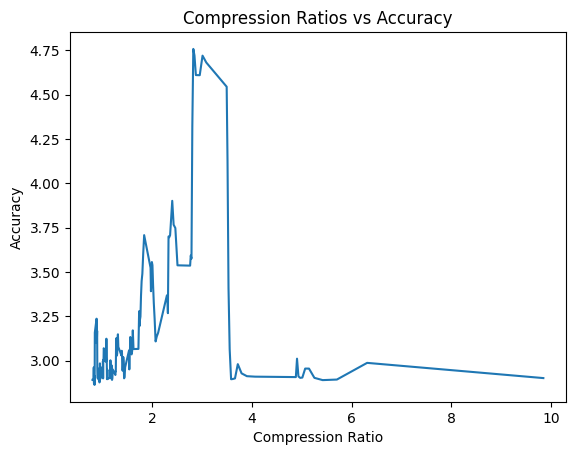

In [ ]:
window_size = 10
x_label = "Compression Ratio"
y_label = "Accuracy"
title = "Compression Ratios vs Accuracy"

smoothing_plot(compression_ratios, runtimes, window_size, x_label, y_label, title)
